# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #coords_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}"
    city_url = f'{url}q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #coords_list = requests.get(coords_url).json()
        #coords=coords_list[0]
        #coords_lat= coords['lat']
        #coords_lon= coords['lon']
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] -273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tarudant
City not found. Skipping...
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | cuamba
Processing Record 4 of Set 1 | mount isa
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | olafsvik
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | namibe
Processing Record 12 of Set 1 | hobyo
Processing Record 13 of Set 1 | astoria
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | puerto cabezas
Processing Record 17 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | contai
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,27.10,79,67,9.01,KI,1675161449
1,cuamba,-14.8031,36.5372,27.45,74,54,2.25,MZ,1675161449
2,mount isa,-20.7333,139.5000,23.87,100,40,2.57,AU,1675161450
3,airai,-8.9266,125.4092,17.12,97,100,0.82,TL,1675161450
4,cape town,-33.9258,18.4232,30.62,37,0,3.60,ZA,1675161382


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,27.10,79,67,9.01,KI,1675161449
1,cuamba,-14.8031,36.5372,27.45,74,54,2.25,MZ,1675161449
2,mount isa,-20.7333,139.5000,23.87,100,40,2.57,AU,1675161450
3,airai,-8.9266,125.4092,17.12,97,100,0.82,TL,1675161450
4,cape town,-33.9258,18.4232,30.62,37,0,3.60,ZA,1675161382


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

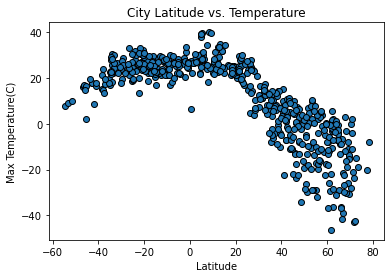

In [9]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df['Lat']
y_values=city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

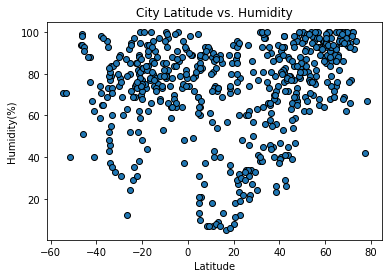

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values=city_data_df['Lat']
y_values=city_data_df['Humidity']
plt.scatter(x_values,y_values,edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

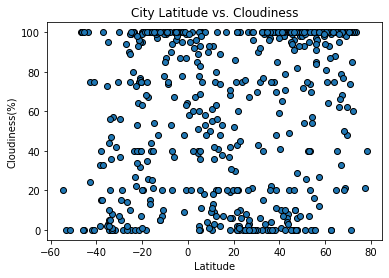

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values=city_data_df['Lat']
y_values=city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

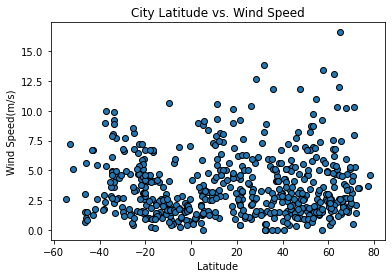

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values=city_data_df['Lat']
y_values=city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.min(), regress_values.min()),fontsize=15,color="red")
    print(f'The r-value is {rvalue}')
    
    

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,27.10,79,67,9.01,KI,1675161449
6,olafsvik,64.8945,-23.7142,-0.65,74,100,16.60,IS,1675161451
8,cherskiy,68.7500,161.3000,-18.91,100,21,1.78,RU,1675161452
10,hobyo,5.3505,48.5268,26.95,60,36,8.77,SO,1675161453
11,astoria,46.1879,-123.8313,0.48,84,0,1.54,US,1675161453


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cuamba,-14.8031,36.5372,27.45,74,54,2.25,MZ,1675161449
2,mount isa,-20.7333,139.5000,23.87,100,40,2.57,AU,1675161450
3,airai,-8.9266,125.4092,17.12,97,100,0.82,TL,1675161450
4,cape town,-33.9258,18.4232,30.62,37,0,3.60,ZA,1675161382
5,chuy,-33.6971,-53.4616,23.10,79,0,2.30,UY,1675161451


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8512361244213238


Text(0, 0.5, 'Max Temp(C)')

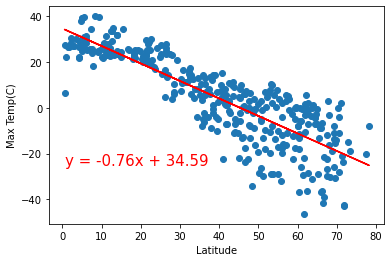

In [16]:
# Linear regression on Northern Hemisphere
y_values=northern_hemi_df['Max Temp']
x_values=northern_hemi_df['Lat']
linear_regression(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')

The r-value is 0.5199880900532947


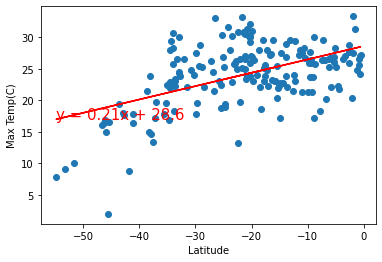

In [17]:
# Linear regression on Southern Hemisphere
y_values=southern_hemi_df['Max Temp']
x_values=southern_hemi_df['Lat']
plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
linear_regression(x_values,y_values)


**Discussion about the linear relationship:** 
* These two scatterplots demonstrate how moving toward the equator will result in higher temperatures.  The opposite is true for moving farther from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.43331781506860506


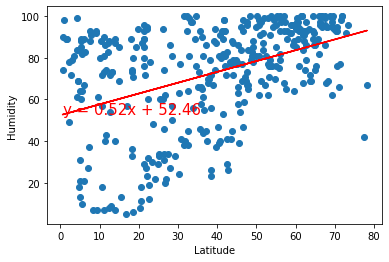

In [18]:
# Northern Hemisphere
y_values=northern_hemi_df['Humidity']
x_values=northern_hemi_df['Lat']
plt.xlabel('Latitude')
plt.ylabel('Humidity')
linear_regression(x_values,y_values)

The r-value is 0.15463521729287158


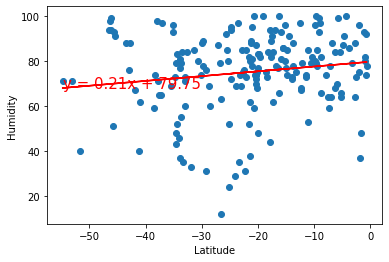

In [19]:
# Southern Hemisphere
y_values=southern_hemi_df['Humidity']
x_values=southern_hemi_df['Lat']
plt.xlabel('Latitude')
plt.ylabel('Humidity')
linear_regression(x_values,y_values)

**Discussion about the linear relationship:** 
* These scatterplots show a positive relationship between latitude and humidity in both hemispheres.  However, the relationship is much stronger in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.32072807685099924


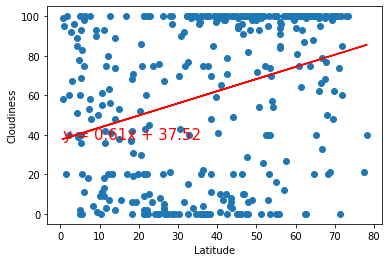

In [20]:
# Northern Hemisphere
y_values=northern_hemi_df['Cloudiness']
x_values=northern_hemi_df['Lat']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
linear_regression(x_values,y_values)

The r-value is 0.39907950663400193


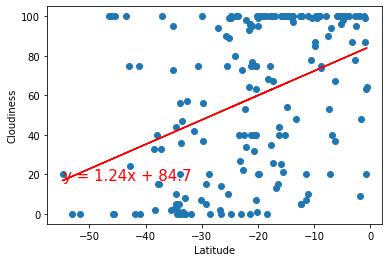

In [21]:
# Southern Hemisphere
y_values=southern_hemi_df['Cloudiness']
x_values=southern_hemi_df['Lat']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
linear_regression(x_values,y_values)

**Discussion about the linear relationship:** 
* The scatterplots show a positive relationship between cloudiness and latitude.  However, the relationship is not very strong and the points are all over the place.  Other factors would have to be taken into account in order to determine causality.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.021204263582642942


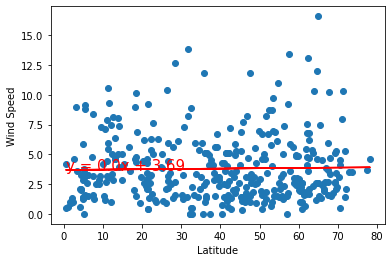

In [22]:
# Northern Hemisphere
y_values=northern_hemi_df['Wind Speed']
x_values=northern_hemi_df['Lat']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
linear_regression(x_values,y_values)

The r-value is -0.3141111669999581


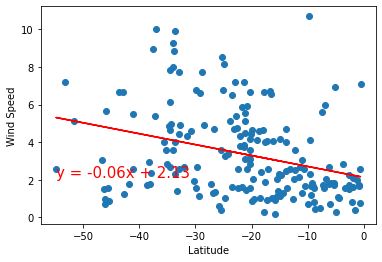

In [23]:
# Southern Hemisphere
y_values=southern_hemi_df['Wind Speed']
x_values=southern_hemi_df['Lat']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
linear_regression(x_values,y_values)

**Discussion about the linear relationship:** 
* Based on the r-value and linear regression equations, it seems that there is a very weak correlation between wind speed and latitude.  Wind speed decreases a bit in the southern hemisphere as you move toward the equator, but latitude seems to have no effect on windspeed in the northern hemisphere.